# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('census-income .csv')
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
annual_income     object
dtype: object

In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [7]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
annual_income         2
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


Value Count Function

In [9]:
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [10]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [11]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [12]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

<AxesSubplot:xlabel='annual_income', ylabel='count'>

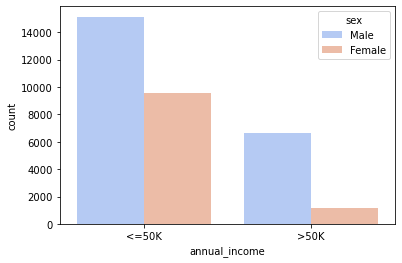

In [13]:
sns.countplot(df['annual_income'],palette='coolwarm',hue='sex',data=df)

Filling? Values

In [14]:
df['workclass']=df['workclass'].replace('?','Private')
df['occupation']=df['occupation'].replace('?','Prof-specialty')
df['native-country']=df['native-country'].replace('?','United-States')

In [15]:
df.head(8)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


Feature Engineering

In [16]:
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [17]:
df['education']=df['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'school')

In [18]:
df['education']=df['education'].replace('HS-grad','high-school')
df['education']=df['education'].replace(['Assoc-voc','Assoc-acdm','Some-college'],'higher')


In [19]:
#marital status
df['marital-status']=df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
df['marital-status']=df['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'other')

In [20]:
df.annual_income=df.annual_income.replace('<=50K',0)
df.annual_income=df.annual_income.replace('>50K',1)

In [21]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,high-school,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,school,5,other,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,high-school,9,married,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [22]:
df['marital-status'].value_counts()

married          14999
Never-married    10683
other             6879
Name: marital-status, dtype: int64

In [23]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,annual_income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
annual_income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<AxesSubplot:>

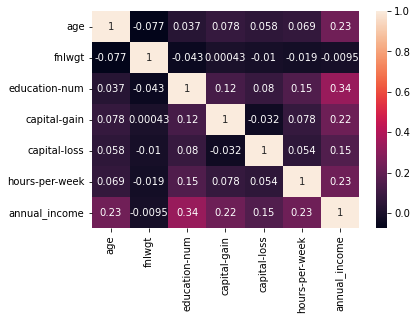

In [24]:
sns.heatmap(df.corr(),annot=True)

Histogram

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>],
       [<AxesSubplot:title={'center':'annual_income'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

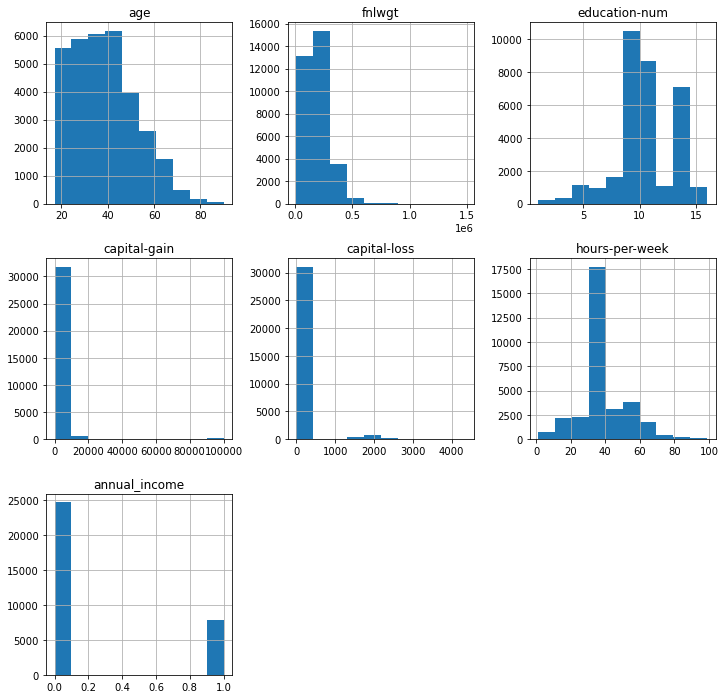

In [25]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False)

Box Plot

age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
education-num     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain         AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
annual_income           AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

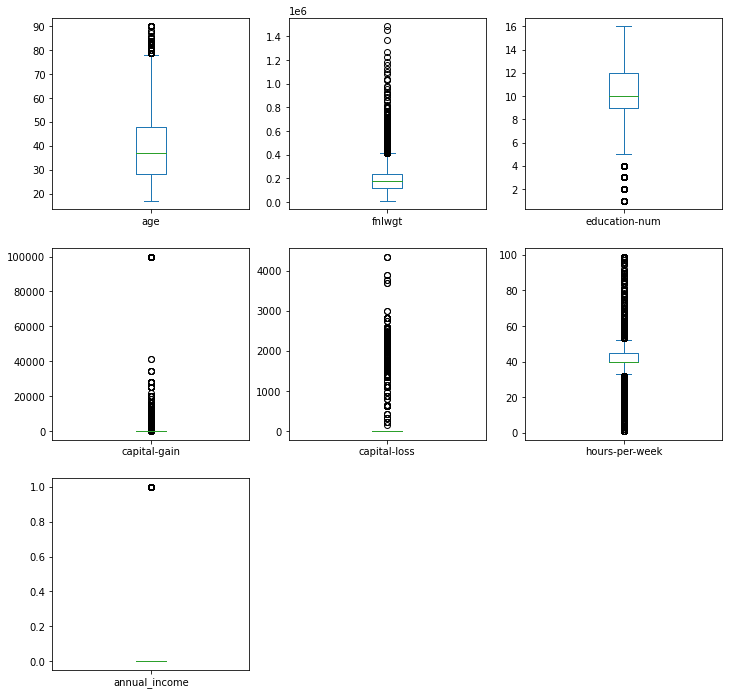

In [26]:
df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True)

<AxesSubplot:xlabel='race', ylabel='count'>

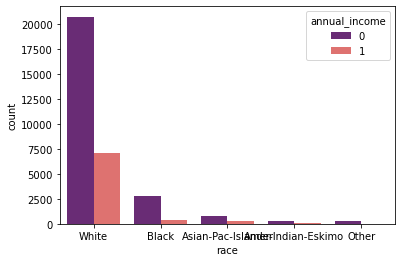

In [27]:
sns.countplot(df['race'],hue='annual_income',data=df,palette='magma')

# Model Building

In [28]:
x=df.drop(['annual_income'],axis=1)
y=df['annual_income']

# Feature Scaling


In [29]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [30]:
df1=df.copy()
df1=df1.apply(LabelEncoder().fit_transform)
df1.head()
#Label Encoder will bring all categorical values to 0 or 1 or change it into numeric format
#Label encoder makes code machine readable
#label encoder fits format into machine readable format

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,22,6,2671,0,12,0,0,1,4,1,25,0,39,38,0
1,33,5,2926,0,12,1,3,0,4,1,0,0,12,38,0
2,21,3,14086,4,8,2,5,1,4,1,0,0,39,38,0
3,36,3,15336,6,6,1,5,0,2,1,0,0,39,38,0
4,11,3,19355,0,12,1,9,5,2,0,0,0,39,4,0


In [31]:
ss=StandardScaler().fit(df1.drop('annual_income',axis=1)) #first fit the data set then transform

In [32]:
x=ss.transform(df1.drop('annual_income',axis=1))
y=df1.annual_income

In [57]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
from sklearn.metrics import accuracy_score

In [64]:
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print("Accuracy on training data: {:,.3f}".format(lr.score(x_train,y_train))) #format upto 3 decimal places
print("Accuracy on test data:{:,.3f}".format(lr.score(x_test,y_test)))

Accuracy on training data: 0.826
Accuracy on test data:0.823


In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [66]:
print(confusion_matrix(y_test,prediction))

[[6963  444]
 [1288 1074]]


In [67]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7407
           1       0.71      0.45      0.55      2362

    accuracy                           0.82      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.82      0.81      9769

